In [379]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

In [380]:
# matplotlib 한글 폰트 셋업
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fm.fontManager.addfont(fontpath)  # 에전의 rebuild 대신 이걸 추가해야 설치한 폰트 추가됨
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)  # Glyph 8722 방지용

In [386]:
data = pd.read_csv('../DATA/merged_data_v1.csv')
data['date'] = pd.to_datetime(data['date'])
data.columns

Index(['date', '국내총생산(명목GDP)', '경제성장률(실질GDP성장률)', 'GSCPI', 'IP', 'F 건설업',
       '    건설투자', '기성총액', '건축공사', '토목공사', '국고채(3년)', '회사채(3년, BBB-)',
       'Dubai(현물)', '전국', '합계', '신축', '증축/개축/이전/대수선', '용도변경', '원/미국달러(매매기준율)',
       '철광석', '유연탄', '기성총액_dif', 'GSCPI_59', 'IP_56', '국고채(3년)_50',
       '회사채(3년, BBB-)_55', 'Dubai(현물)_dif_15', '원/미국달러(매매기준율)_dif_24',
       '철광석_dif_14', '유연탄_dif_47', 'Spread_52', '전국_dif', '합계_dif',
       'F 건설업_dif', '기성총액_dif_1'],
      dtype='object')

- 국내총생산 및 기성총액

In [342]:
# 연 데이터
data_year = data[['date', '국내총생산(명목GDP)','기성총액']]
data_year = data_year.dropna()
data_year['date'] = data_year['date'].dt.year
data_year.head()

,date,국내총생산(명목GDP),기성총액
422,1998,537215.0,3982520.0
434,1999,591453.0,3782730.0
446,2000,651634.0,3423372.0
458,2001,707021.0,3791434.0
470,2002,784741.0,4468476.0


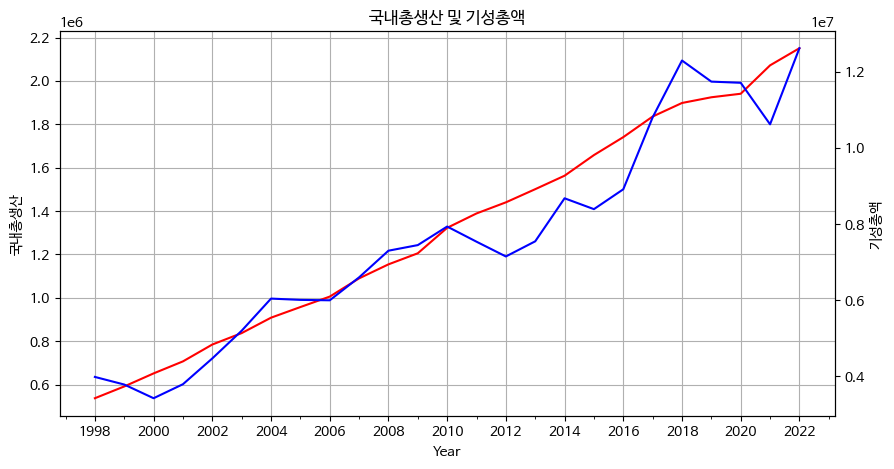

In [343]:
x = data_year['date']
y1 = data_year['국내총생산(명목GDP)']
y2 = data_year['기성총액']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, y1, color = 'red')
ax1.set_xlabel('Year')
ax1.set_ylabel('국내총생산')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('기성총액')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

plt.title('국내총생산 및 기성총액')
ax1.grid(True)
plt.savefig('./EDA_output/국내총생산 및 기성총액.jpg')
plt.show()

- 경제성장률 및 기성총액

In [345]:
# 연 데이터
data_year = data[['date', '경제성장률(실질GDP성장률)','기성총액']]
data_year = data_year.dropna()
data_year['date'] = data_year['date'].dt.year
data_year.head()

,date,경제성장률(실질GDP성장률),기성총액
422,1998,-5.1,3982520.0
434,1999,11.5,3782730.0
446,2000,9.1,3423372.0
458,2001,4.9,3791434.0
470,2002,7.7,4468476.0


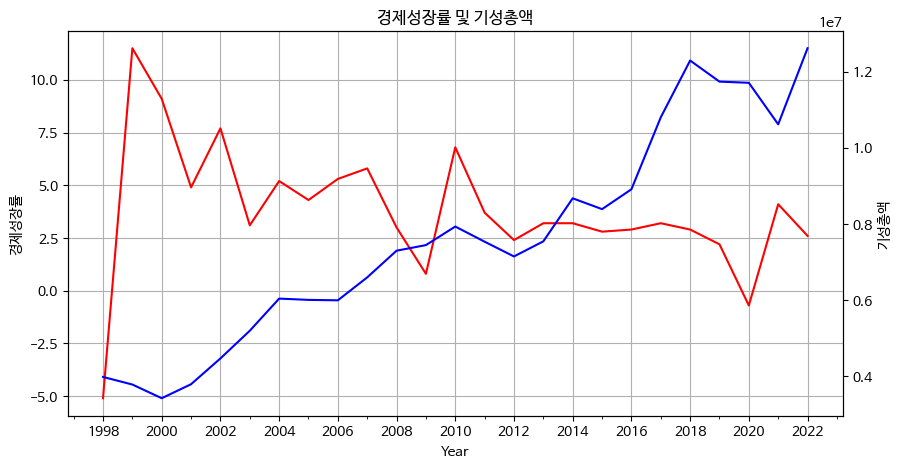

In [346]:
x = data_year['date']
y1 = data_year['경제성장률(실질GDP성장률)']
y2 = data_year['기성총액']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, y1, color = 'red')
ax1.set_xlabel('Year')
ax1.set_ylabel('경제성장률')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('기성총액')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

plt.title('경제성장률 및 기성총액')
ax1.grid(True)
plt.savefig('./EDA_output/경제성장률 및 기성총액.jpg')
plt.show()

- 연도별 기성총액 및 기성총액 증가율

In [404]:
# 월 데이터
data['기성총액(100만원)'] = data['기성총액'] / 1000000
data_month = data[['date', '기성총액(100만원)','기성총액_dif']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')
data_month.head()

,date,기성총액(100만원),기성총액_dif
428,1998-07,3.857138,-0.140519
429,1998-08,3.692541,-0.233118
430,1998-09,3.797432,-0.209151
431,1998-10,4.091186,-0.156918
432,1998-11,3.969769,-0.158606


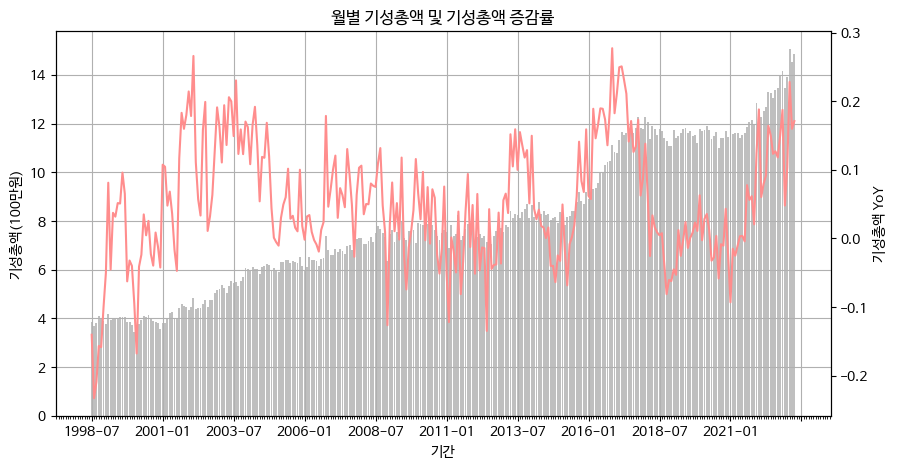

In [405]:
x = data_month['date']
y1 = data_month['기성총액(100만원)']
y2 = data_month['기성총액_dif']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(x, y1, color = 'gray', alpha=0.5)
ax1.set_xlabel('기간')
ax1.set_ylabel('기성총액(100만원)')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='#FF8D8D')
ax2.set_ylabel('기성총액 YoY')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=30))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

plt.title('월별 기성총액 및 기성총액 증감률')
ax1.grid(True)
plt.savefig('./EDA_output/월별 기성총액 및 기성총액 YoY.jpg')
plt.show()

- 전체기간 기성총액

In [349]:
# 월 데이터
data_month = data[['date', '기성총액']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')
data_month.head()

,date,기성총액
416,1997-07,4487750.0
417,1997-08,4815008.0
418,1997-09,4801715.0
419,1997-10,4852654.0
420,1997-11,4718087.0


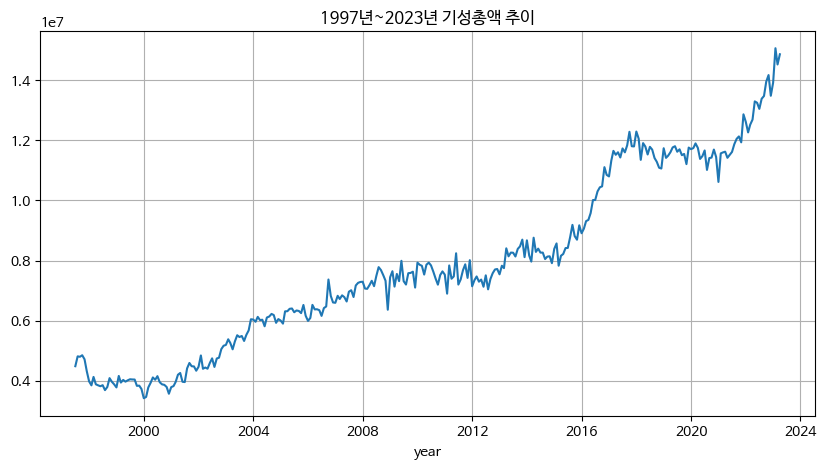

In [350]:
plt.figure(figsize=(10, 5))

x = data['date']
y = data['기성총액']
plt.plot(x,y)
plt.grid(True)
plt.title('1997년~2023년 기성총액 추이')
plt.xlabel('year')
plt.savefig('./EDA_output/1997년~2023년 기성총액 추이.jpg')
plt.show()

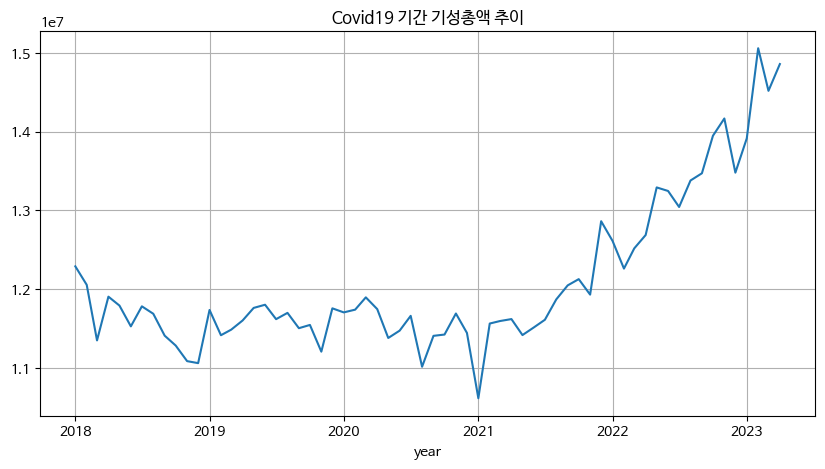

In [351]:
plt.figure(figsize=(10, 5))

data_covid = data[662:]
x = data_covid['date']
y = data_covid['기성총액']
plt.plot(x, y)

# x축 레이블 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.title('Covid19 기간 기성총액 추이')
plt.xlabel('year')
plt.savefig('./EDA_output/Covid19 기간 기성총액 추이.jpg')
plt.show()

- 전체기간 시차 준 기성총액

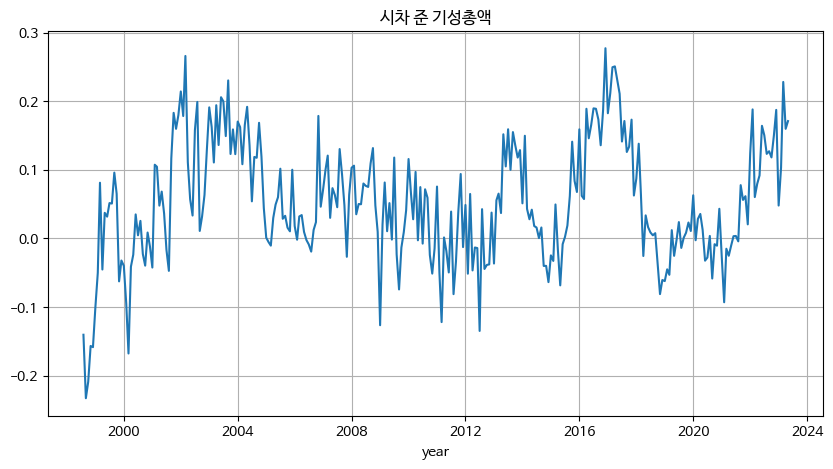

In [352]:
plt.figure(figsize=(10, 5))

x = data['date']
y = data['기성총액_dif_1']
plt.plot(x,y)
plt.grid(True)
plt.title('시차 준 기성총액')
plt.xlabel('year')
plt.savefig('./EDA_output/시차 준 기성총액.jpg')
plt.show()

- 세계 산업생산지수와 건설기성 추이

In [353]:
# 월 데이터
data_month = data[['date', 'IP', '기성총액']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')

data_month.head()

,date,IP,기성총액
416,1997-07,0.543258,4487750.0
417,1997-08,0.341942,4815008.0
418,1997-09,0.356138,4801715.0
419,1997-10,0.636749,4852654.0
420,1997-11,0.062246,4718087.0


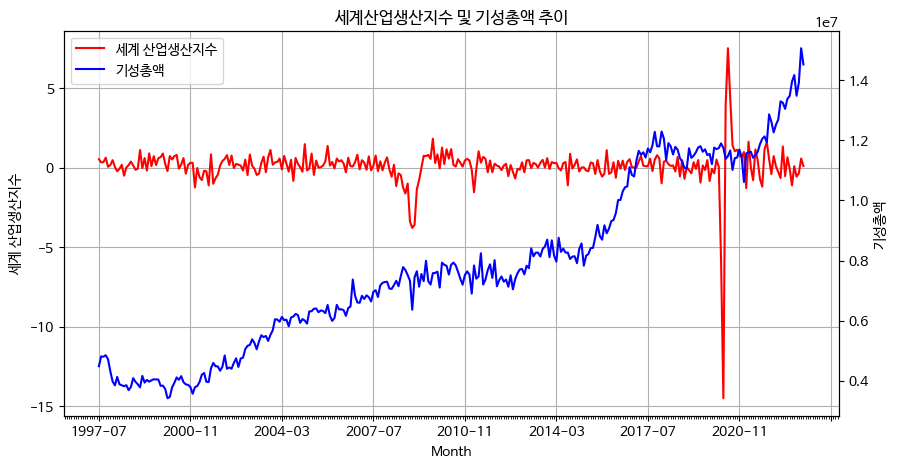

In [354]:
x = data_month['date']
y1 = data_month['IP']
y2 = data_month['기성총액']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, y1, color = 'red')
ax1.set_xlabel('Month')
ax1.set_ylabel('세계 산업생산지수')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('기성총액')

lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
labels = ['세계 산업생산지수', '기성총액']
plt.legend(lines, labels, loc='upper left')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=40))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

plt.title('세계산업생산지수 및 기성총액 추이')
ax1.grid(True)
plt.savefig('./EDA_output/세계산업생산지수 및 기성총액 추이.jpg')
plt.show()

In [355]:
# 월 데이터
data_month = data[['date', 'GSCPI', '기성총액']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')

data_month.head()

,date,GSCPI,기성총액
422,1998-01,-0.924231,3982520.0
423,1998-02,-0.436567,3851367.0
424,1998-03,-0.093793,4131394.0
425,1998-04,-0.137401,3886013.0
426,1998-05,-0.506977,3852366.0


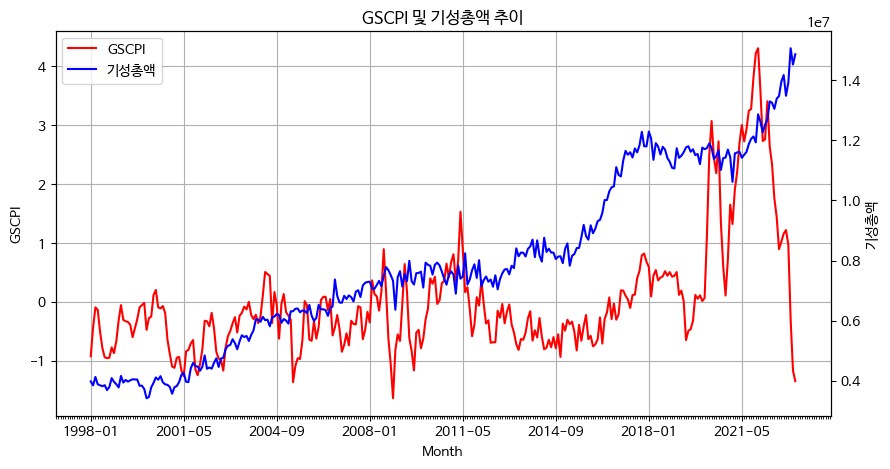

In [357]:
x = data_month['date']
y1 = data_month['GSCPI']
y2 = data_month['기성총액']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, y1, color = 'red')
ax1.set_xlabel('Month')
ax1.set_ylabel('GSCPI')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('기성총액')

# 범례 설정
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
labels = ['GSCPI', '기성총액']
plt.legend(lines, labels, loc='upper left')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=40))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

plt.title('GSCPI 및 기성총액 추이')
ax1.grid(True)
plt.savefig('./EDA_output/GSCPI 및 기성총액 추이.jpg')
plt.show()

- 국고채 추이

In [358]:
# 월 데이터
data_month = data[['date', '국고채(3년)', '회사채(3년, BBB-)']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')
data_month.head()

,date,국고채(3년),"회사채(3년, BBB-)"
455,2000-10,7.84,11.61
456,2000-11,7.31,11.80
457,2000-12,6.79,11.80
458,2001-01,5.99,11.65
459,2001-02,5.43,11.64


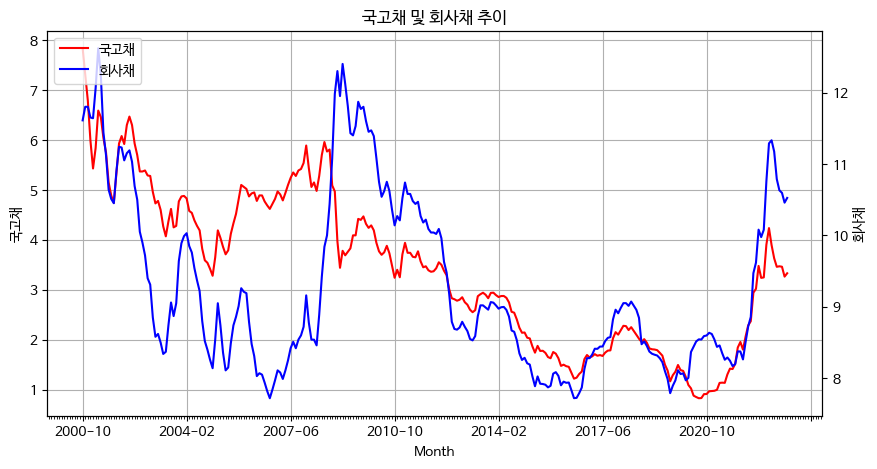

In [359]:
x = data_month['date']
y1 = data_month['국고채(3년)']
y2 = data_month['회사채(3년, BBB-)']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, y1, color = 'red')
ax1.set_xlabel('Month')
ax1.set_ylabel('국고채')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('회사채')

# 범례 설정
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
labels = ['국고채', '회사채']
plt.legend(lines, labels, loc='upper left')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=40))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

plt.title('국고채 및 회사채 추이')
ax1.grid(True)
plt.savefig('./EDA_output/국고채 및 회사채 추이.jpg')
plt.show()

- 두바이유 

In [360]:
# 월 데이터
data_month = data[['date', 'Dubai(현물)', 'Dubai(현물)_dif_15']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')
data_month.head()

,date,Dubai(현물),Dubai(현물)_dif_15
305,1988-04,15.40,-0.117949
306,1988-05,14.98,0.106164
307,1988-06,14.70,0.561818
308,1988-07,13.65,0.681592
309,1988-08,12.70,0.540541


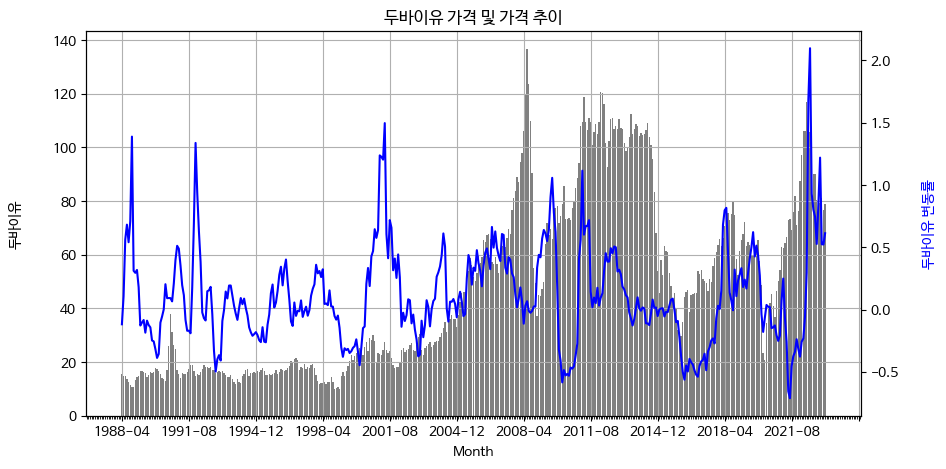

In [361]:
x = data_month['date']
y1 = data_month['Dubai(현물)']
y2 = data_month['Dubai(현물)_dif_15']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(x, y1, color = 'gray')
ax1.set_xlabel('Month')
ax1.set_ylabel('두바이유')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('두바이유 변동률', color='blue')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=40))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

# y축 레이블 설정
ax1.yaxis.set_label_coords(-0.08, 0.5)  # 첫 번째 y축 레이블 위치
ax2.yaxis.set_label_coords(1.08, 0.5)  # 두 번째 y축 레이블 위치

plt.title('두바이유 가격 및 가격 추이')
ax1.grid(True)

plt.savefig('./EDA_output/두바이유 가격 및 가격 추이.jpg')
plt.show()

- 철광석

In [362]:
# 월 데이터
data_month = data[['date', '철광석', '철광석_dif_14']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')
data_month.head()

,date,철광석,철광석_dif_14
124,1973-03,12.43,-0.106729
125,1973-04,12.43,-0.096674
126,1973-05,12.43,-0.095722
127,1973-06,8.93,-0.140167
128,1973-07,8.93,-0.115813


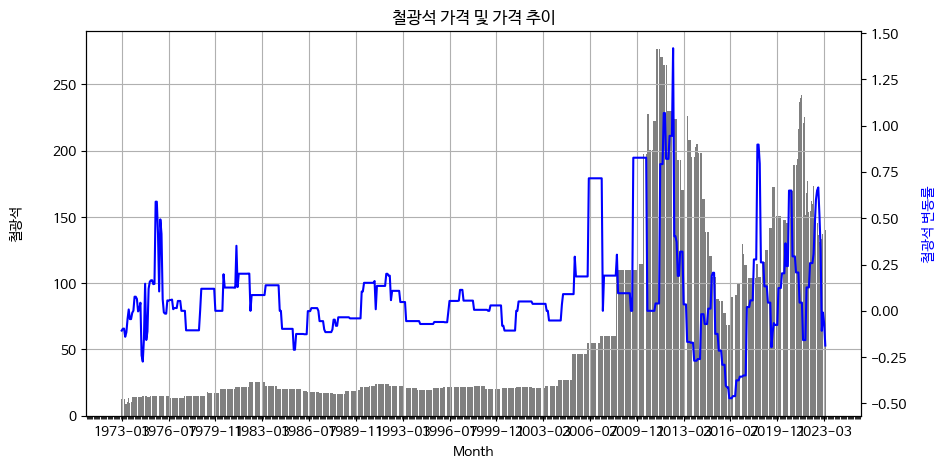

In [363]:
x = data_month['date']
y1 = data_month['철광석']
y2 = data_month['철광석_dif_14']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(x, y1, color = 'gray')
ax1.set_xlabel('Month')
ax1.set_ylabel('철광석')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('철광석 변동률', color='blue')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=40))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

# y축 레이블 설정
ax1.yaxis.set_label_coords(-0.08, 0.5)  # 첫 번째 y축 레이블 위치
ax2.yaxis.set_label_coords(1.08, 0.5)  # 두 번째 y축 레이블 위치

plt.title('철광석 가격 및 가격 추이')
ax1.grid(True)
plt.savefig('./EDA_output/철광석 가격 및 가격 추이.jpg')
plt.show()

- 유연탄

In [364]:
# 월 데이터
data_month = data[['date', '유연탄', '유연탄_dif_47']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')
data_month.head()

,date,유연탄,유연탄_dif_47
157,1975-12,39.48,0.0
158,1976-01,39.48,0.0
159,1976-02,43.74,0.0
160,1976-03,66.63,0.0
161,1976-04,66.63,0.0


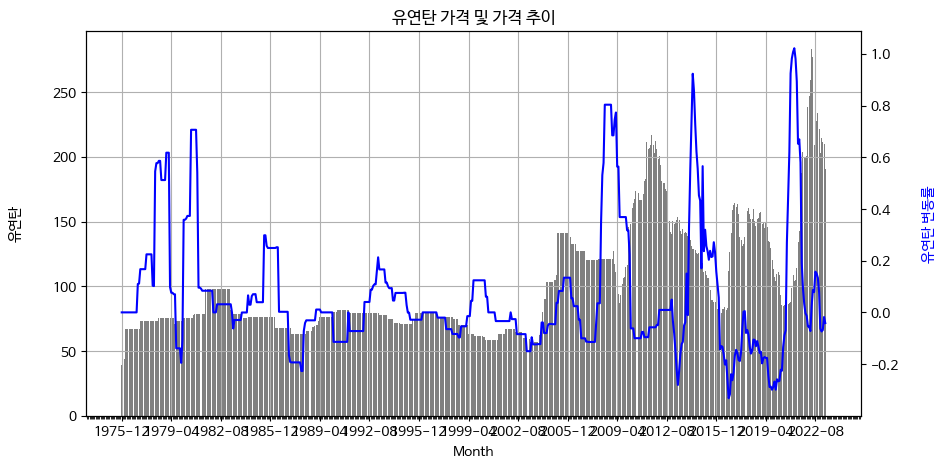

In [365]:
x = data_month['date']
y1 = data_month['유연탄']
y2 = data_month['유연탄_dif_47']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(x, y1, color = 'gray')
ax1.set_xlabel('Month')
ax1.set_ylabel('유연탄')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('유연탄 변동률', color='blue')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=40))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

# y축 레이블 설정
ax1.yaxis.set_label_coords(-0.08, 0.5)  # 첫 번째 y축 레이블 위치
ax2.yaxis.set_label_coords(1.08, 0.5)  # 두 번째 y축 레이블 위치

plt.title('유연탄 가격 및 가격 추이')
ax1.grid(True)
plt.savefig('./EDA_output/유연탄 가격 및 가격 추이.jpg')
plt.show()

- 원자재 추이

In [366]:
# 월 데이터
data_month = data[['date', 'Dubai(현물)','철광석', '유연탄']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')
data_month.head()

,date,Dubai(현물),철광석,유연탄
278,1986-01,19.50,19.79,76.55
279,1986-02,14.60,18.69,76.55
280,1986-03,11.00,18.69,76.55
281,1986-04,10.05,18.69,67.82
282,1986-05,11.10,18.69,67.82


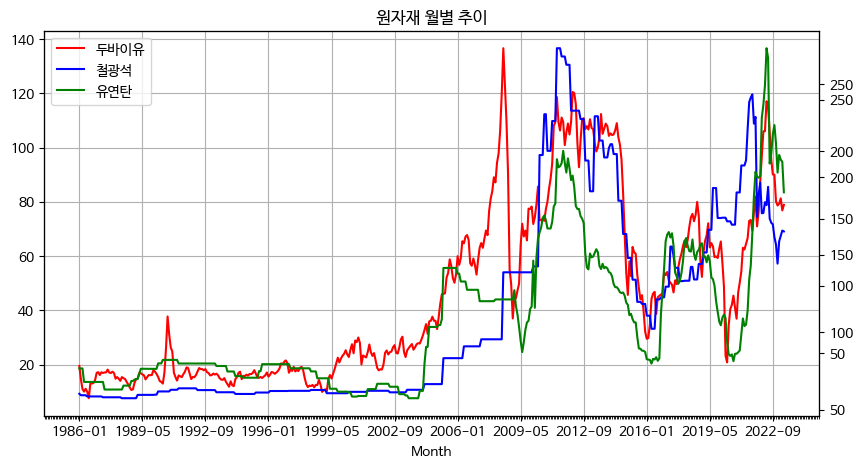

<function matplotlib.pyplot.savefig(*args, **kwargs)>

<Figure size 640x480 with 0 Axes>

In [367]:
x = data_month['date']
y1 = data_month['Dubai(현물)']
y2 = data_month['철광석']
y3 = data_month['유연탄']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, y1, color = 'red')
ax1.set_xlabel('Month')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='green')

lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0]]
labels = ['두바이유', '철광석', '유연탄']
plt.legend(lines, labels, loc='upper left')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=40))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))


plt.title('원자재 월별 추이')
ax1.grid(True)
plt.show()
plt.savefig('./EDA_output/원자재 월별 추이.jpg')
plt.savefig

- 건축공사 및 토목공사 추이

In [368]:
# 월 데이터
data_month = data[['date', '건축공사', '토목공사']]
data_month = data_month.dropna()
data_month['date'] = data_month['date'].dt.strftime('%Y-%m')
data_month.head()

,date,건축공사,토목공사
416,1997-07,2725684.0,1762066.0
417,1997-08,2893724.0,1921284.0
418,1997-09,3045267.0,1756448.0
419,1997-10,3060425.0,1792229.0
420,1997-11,2933910.0,1784177.0


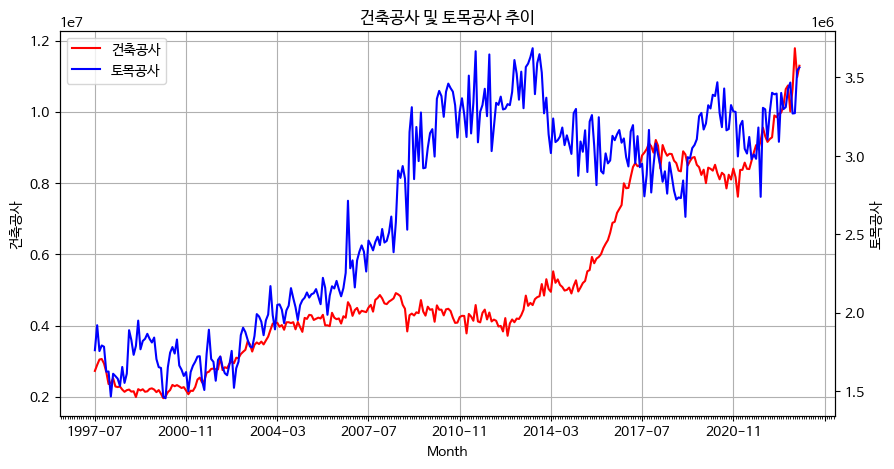

In [369]:
x = data_month['date']
y1 = data_month['건축공사']
y2 = data_month['토목공사']

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, y1, color='red')
ax1.set_xlabel('Month')
ax1.set_ylabel('건축공사')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')
ax2.set_ylabel('토목공사')

# 범례 설정
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
labels = ['건축공사', '토목공사']
plt.legend(lines, labels, loc='upper left')

# x축 눈금 설정
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=40))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))

plt.title('건축공사 및 토목공사 추이')
ax1.grid(True)
plt.savefig('./EDA_output/건축공사 및 토목공사 추이.jpg')
plt.show()

- 연도별 건설투자

In [370]:
# 월 데이터
data_quarter = data[['date', '    건설투자']]
data_quarter = data_quarter.dropna()
data_quarter.head()

,date,건설투자
1,1960-04-01,3.5
2,1960-07-01,-16.7
3,1960-10-01,-10.0
4,1961-01-01,24.5
5,1961-04-01,1.7


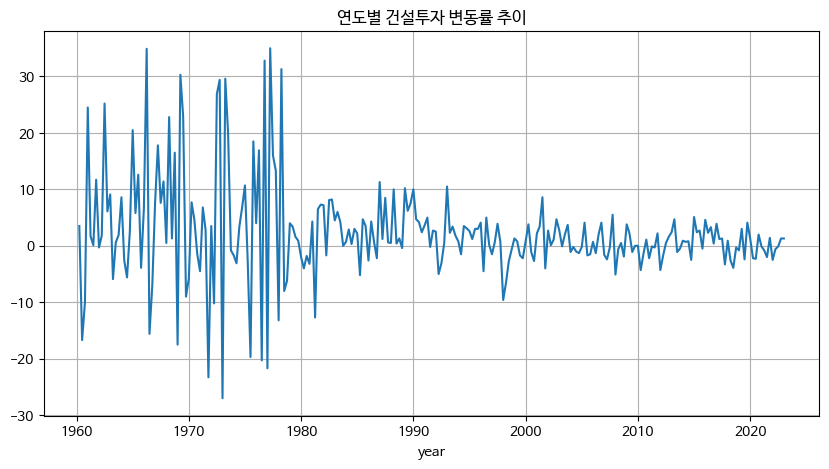

In [371]:
plt.figure(figsize=(10, 5))
x = data_quarter['date']
y = data_quarter['    건설투자']

plt.plot(x, y)
plt.title('연도별 건설투자 변동률 추이')
plt.grid(True)
plt.xlabel('year')
plt.savefig('./EDA_output/연도별 건설투자 변동률 추이.jpg')
plt.show()

- 원/미국달러 추이

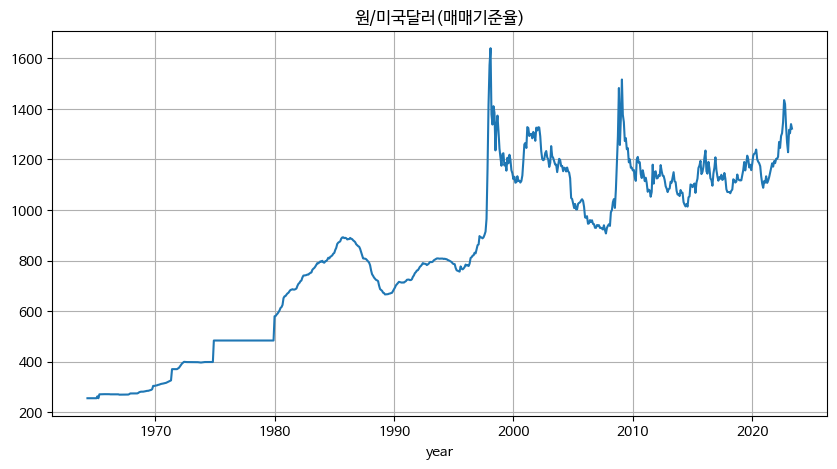

In [375]:
plt.figure(figsize=(10, 5))
x = data['date']
y = data['원/미국달러(매매기준율)']

plt.plot(x, y)
plt.title('원/미국달러(매매기준율)')
plt.grid(True)
plt.xlabel('year')
plt.savefig('./EDA_output/원-미국달러(매매기준율).jpg')
plt.show()

- 연도별 Spread 추이

In [376]:
# 월 데이터
data_month = data[['date', 'Spread_52']]
data_month = data_month.dropna()
data_month.head()

,date,Spread_52
507,2005-02-01,3.77
508,2005-03-01,4.49
509,2005-04-01,5.01
510,2005-05-01,5.66
511,2005-06-01,6.21


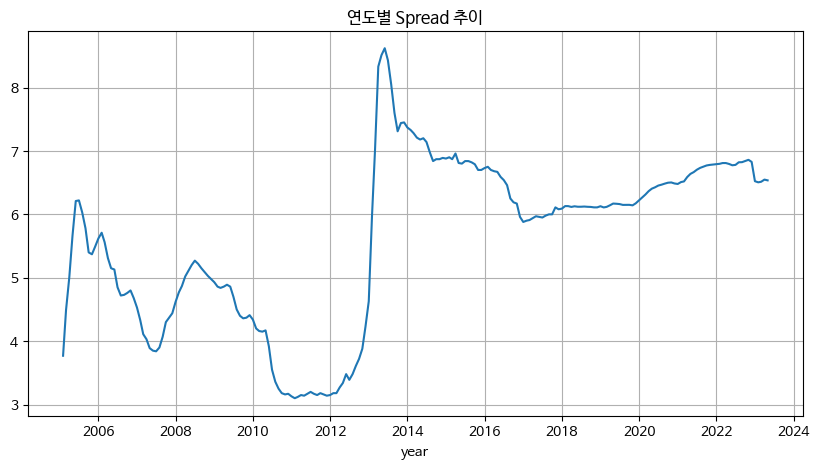

In [377]:
plt.figure(figsize=(10, 5))

x = data_month['date']
y = data_month['Spread_52']
plt.plot(x,y)
plt.grid(True)
plt.title('연도별 Spread 추이')
plt.xlabel('year')
plt.savefig('./EDA_output/연도별 Spread 추이.jpg')
plt.show()

- 상관관계

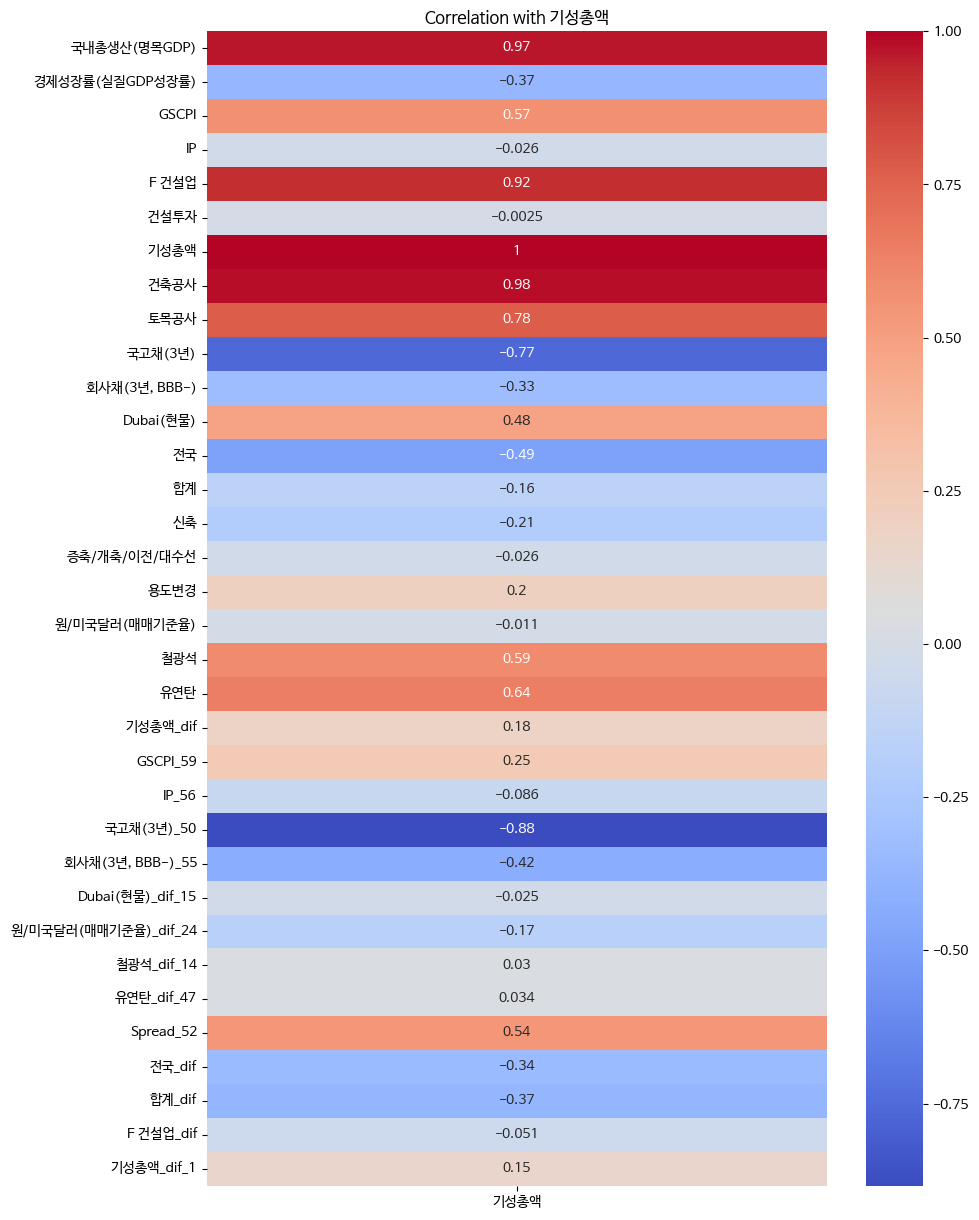

In [378]:
plt.figure(figsize = (10,15))
data_corr = data.drop(columns=['date'])
corr_matrix = data_corr.corr()
corr_기성총액 = corr_matrix[['기성총액']]

sns.heatmap(corr_기성총액, annot=True, cmap='coolwarm')
plt.title('Correlation with 기성총액')
plt.savefig('./EDA_output/Correlation with 기성총액.jpg')
plt.show()